# Analyse des donn√©es

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Charger le fichier JSON
df = pd.read_json("Data.json", lines=True)

# Afficher les 5 premi√®res lignes
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

In [30]:
# Afficher les colonnes disponibles
print(df.columns)

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


In [28]:
# Informations g√©n√©rales sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB
None


In [29]:
# Quelques statistiques de base sur les colonnes num√©riques
print(df.describe())

            overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09


### D√©s√©quilibre des classes dans les avis

La grande majorit√© des avis sont positifs, avec une note de 4 ou 5.

Ce d√©s√©quilibre peut poser un probl√®me dans le cadre d‚Äôune classification multiclasse (positif, neutre, n√©gatif), car les avis n√©gatifs et neutres sont sous-repr√©sent√©s.

Il pourrait donc √™tre pertinent d‚Äôenvisager un √©quilibrage des classes, en appliquant par exemple des techniques de sous-√©chantillonnage de la classe majoritaire ou de sur-√©chantillonnage (comme SMOTE) pour les classes minoritaires, afin d‚Äôam√©liorer les performances du mod√®le de pr√©diction.

In [31]:
print(df.isnull().sum())

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


Nous avons v√©rifi√© les colonnes essentielles suivantes : `reviewText`, `overall` et `summary`. Aucune valeur manquante n‚Äôa √©t√© d√©tect√©e pour ces champs, ce qui garantit l‚Äôint√©grit√© des donn√©es n√©cessaires √† l‚Äôanalyse.  
Concernant la colonne `reviewerName`, bien qu‚Äôelle contienne quelques valeurs manquantes, nous avons d√©cid√© de les ignorer, car cette information n‚Äôest pas critique pour notre √©tude.

In [32]:
# Exclure la colonne 'helpful' pour d√©tecter les doublons
df_no_helpful = df.drop(columns=['helpful'])
print(df_no_helpful.duplicated().sum())

0


il y a pas des doublons

In [33]:
print(df["overall"].value_counts().sort_index())

overall
1     217
2     250
3     772
4    2084
5    6938
Name: count, dtype: int64


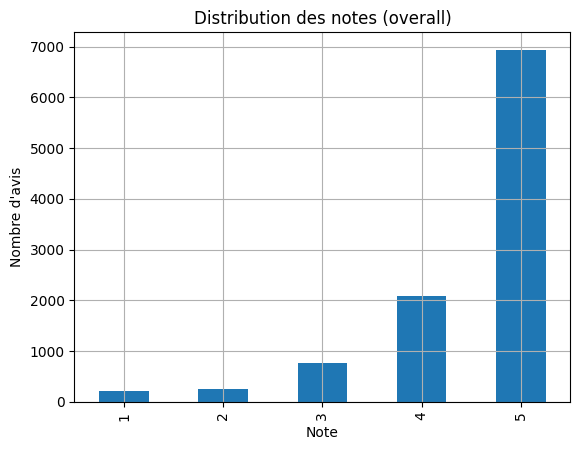

In [34]:
df["overall"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des notes (overall)")
plt.xlabel("Note")
plt.ylabel("Nombre d'avis")
plt.grid(True)
plt.show()

### D√©s√©quilibre important des classes

Les donn√©es pr√©sentent un fort d√©s√©quilibre :

- Plus de **87 %** des avis sont **positifs** (note 4 ou 5).
- Moins de **5 %** sont **n√©gatifs** (note 1 ou 2).

Ce d√©s√©quilibre peut **biaisser l‚Äôentra√Ænement du mod√®le**, qui risque de **pr√©dire la classe ¬´ positif ¬ª de mani√®re excessive**, au d√©triment des classes minoritaires.  
Il est donc essentiel de prendre ce ph√©nom√®ne en compte, notamment par des techniques d‚Äô√©quilibrage ou des m√©triques d‚Äô√©valuation adapt√©es.

In [35]:
df["text_length"] = df["reviewText"].apply(lambda x: len(str(x)))
print(df["text_length"].describe())

count    10261.000000
mean       485.929052
std        613.436113
min          0.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: text_length, dtype: float64


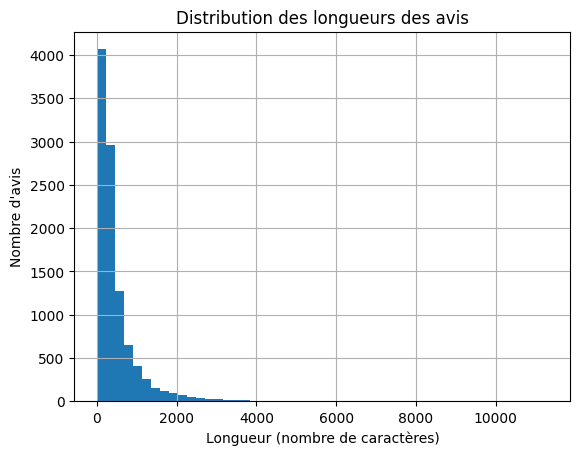

In [36]:
df["text_length"].hist(bins=50)
plt.title("Distribution des longueurs des avis")
plt.xlabel("Longueur (nombre de caract√®res)")
plt.ylabel("Nombre d'avis")
plt.show()

### Analyse de la longueur des avis

- La majorit√© des avis ont une longueur **courte √† moyenne**, comprise entre **162 et 552 caract√®res**.
- Quelques avis sont **tr√®s longs** (jusqu‚Äô√† **11 000 caract√®res**), ce qui peut **augmenter les temps de traitement** lors de l'entra√Ænement du mod√®le.
- Certains avis sont **vides** (longueur = 0) : ces lignes doivent √™tre **supprim√©es**, car elles sont **inutiles pour l‚Äôanalyse et l'apprentissage automatique**.

In [37]:
# Supprimer les lignes o√π le texte est vide
df = df[df['text_length'] > 0]

In [38]:
# Conversion du timestamp Unix en date lisible
df["reviewTime"] = pd.to_datetime(df["unixReviewTime"], unit='s')

# Extraire l'ann√©e
df["reviewYear"] = df["reviewTime"].dt.year

# Compter les avis par ann√©e
print(df["reviewYear"].value_counts().sort_index())

reviewYear
2004       7
2005       4
2006      10
2007      22
2008      63
2009     127
2010     350
2011    1006
2012    1933
2013    4053
2014    2679
Name: count, dtype: int64


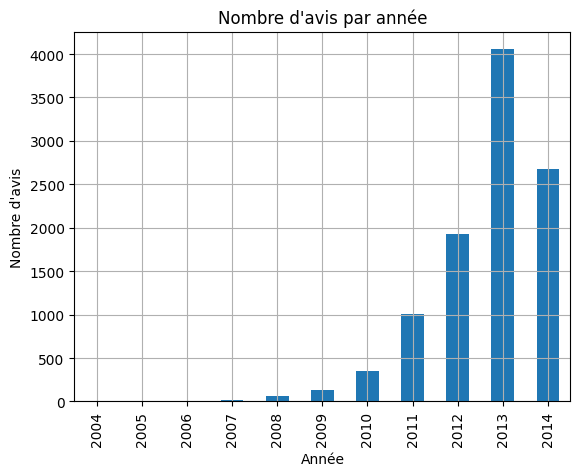

In [39]:
df["reviewYear"].value_counts().sort_index().plot(kind="bar")
plt.title("Nombre d'avis par ann√©e")
plt.xlabel("Ann√©e")
plt.ylabel("Nombre d'avis")
plt.grid(True)
plt.show()

### R√©partition des avis par ann√©e

L‚Äôanalyse temporelle montre que la majorit√© des avis sont concentr√©s entre **2011 et 2014**, avec un **pic significatif en 2013**. Cette ann√©e seule repr√©sente **plus de 4 000 avis**, soit **environ 40 %** du jeu de donn√©es, ce qui en fait une ann√©e dominante.

En revanche, les ann√©es ant√©rieures (de **2004 √† 2010**) contiennent **tr√®s peu d‚Äô√©valuations**, les rendant **statistiquement peu repr√©sentatives**.

Ainsi, il peut √™tre pertinent d‚Äô**exclure ces ann√©es** dans certaines analyses, afin de travailler sur un **√©chantillon plus homog√®ne et pertinent**.

In [40]:
def create_label(row):
    if row['overall'] < 3:
        return 0  # n√©gatif
    elif row['overall'] == 3:
        return 1  # neutre
    else:
        return 2  # positif

df['label'] = df.apply(create_label, axis=1)

In [42]:
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

In [43]:
df.head(1)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   

                                       reviewerName helpful  \
0  cassandra tu "Yeah, well, that's just like, u...  [0, 0]   

                                          reviewText  overall summary  \
0  Not much to write about here, but it does exac...        5    good   

   unixReviewTime reviewTime  text_length  reviewYear  label  word_count  
0      1393545600 2014-02-28          268        2014      2          51

        count        mean         std   min    25%    50%    75%      max
label                                                                    
0       467.0  579.205567  672.310315  32.0  224.0  375.0  682.0   7180.0
1       772.0  579.211140  772.882466  24.0  172.0  351.5  642.5  10275.0
2      9015.0  473.486190  593.570029   9.0  160.0  275.0  538.0  11310.0


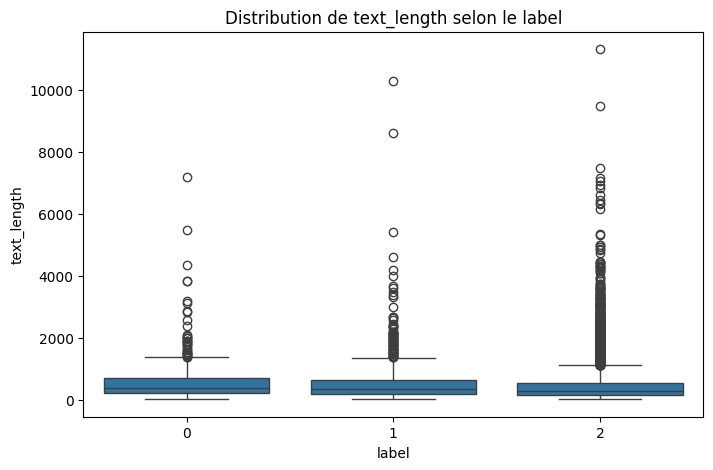

In [44]:
# Statistiques descriptives
print(df.groupby('label')['text_length'].describe())

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Distribution de text_length selon le label')
plt.show()

        count        mean         std  min   25%   50%    75%     max
label                                                                
0       467.0  107.531049  121.711721  7.0  42.0  70.0  127.5  1290.0
1       772.0  107.773316  138.667100  5.0  33.0  67.0  122.0  1760.0
2      9015.0   87.848364  107.794190  1.0  30.0  52.0  101.0  2043.0


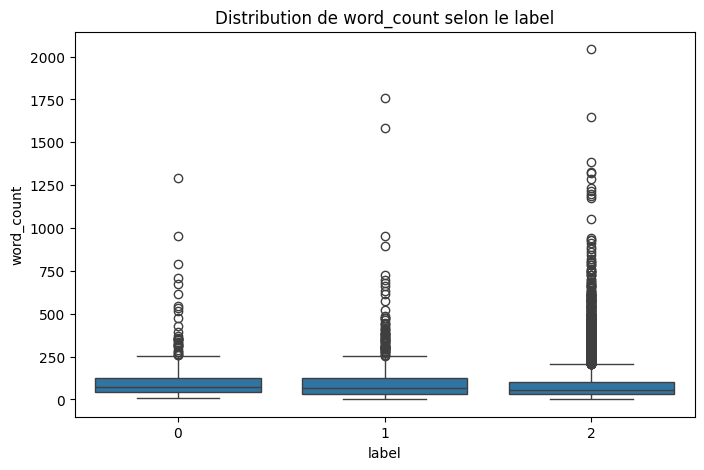

In [45]:
# Statistiques descriptives
print(df.groupby('label')['word_count'].describe())

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='word_count', data=df)
plt.title('Distribution de word_count selon le label')
plt.show()

###  Synth√®se g√©n√©rale des longueurs de texte

- Les **avis positifs** ont tendance √† √™tre **plus courts**, avec **moins de mots** et **moins de caract√®res**.
- Les **avis n√©gatifs** et **neutres** sont g√©n√©ralement **plus longs** et **plus d√©taill√©s** (plus de mots, plus de caract√®res).
- La **dispersion** (√©cart-type) est **√©lev√©e** pour tous les types d‚Äôavis, ce qui indique une **grande variabilit√©** dans la longueur des textes.

---

###  Pourquoi `word_count` et `text_length` sont-ils importants pour l‚Äôentra√Ænement du mod√®le ?

####  Informations suppl√©mentaires
Ces deux colonnes fournissent des **informations quantitatives** sur la **longueur** et la **richesse** des avis. Cela peut influencer la **nature** et la **polarit√©** du texte.

####  Caract√©ristiques discriminantes
On observe que la **longueur moyenne** et le **nombre de mots** diff√®rent selon le **type d‚Äôavis** (positif, neutre, n√©gatif). Ces variables peuvent donc aider le mod√®le √† **mieux distinguer les classes**.

####  Am√©lioration de la performance
L‚Äôajout de ces features offre au mod√®le un **contexte suppl√©mentaire**, surtout si certains textes sont tr√®s courts ou tr√®s variables. Cela peut **renforcer la robustesse** du mod√®le.

####  Gestion des biais
Les avis **tr√®s courts** ou **tr√®s longs** peuvent induire des biais. En int√©grant leur longueur, le mod√®le est **mieux √©quip√©** pour traiter ces cas et **r√©duire les erreurs** dues uniquement au contenu textuel.

---

 **Conclusion** : `word_count` et `text_length` sont des **features simples mais puissantes**, qui compl√®tent efficacement le traitement du texte brut et **am√©liorent les performances globales du mod√®le**.

# Mini Projet Big Data 2024-2025: Analyse des avis clients Amazon en temps r√©el

## 1. Configuration initiale

### 1.1 Importation des biblioth√®ques

In [2]:
# Importation des biblioth√®ques n√©cessaires
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
from pyspark.ml.feature import StringIndexerModel
warnings.filterwarnings('ignore')

# Import des biblioth√®ques PySpark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, when, lit, rand, length, size, split
from pyspark.sql.types import StringType, FloatType
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

### 1.2 T√©l√©chargement des ressources NLTK

*NLTK n√©cessite le t√©l√©chargement de certaines ressources linguistiques pour fonctionner correctement. Cette cellule s'en charge.*

In [3]:
# T√©l√©chargement des ressources NLTK n√©cessaires
def download_nltk_resources():
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('punkt_tab')

### 1.3 Initialisation de Spark

*Configuration de la session Spark avec des param√®tres m√©moire adapt√©s au traitement des donn√©es volumineuses.*

In [4]:
def initialize_spark():
    """Initialisation de la session Spark avec plus de m√©moire"""
    spark = SparkSession.builder \
        .appName("AmazonReviewsSentimentAnalysis") \
        .config("spark.driver.memory", "4g") \
        .config("spark.executor.memory", "4g") \
        .getOrCreate()
    print("Spark version:", spark.version)
    return spark

## 2. Chargement et exploration des donn√©es

### 2.1 Chargement des donn√©es

*Les donn√©es sont charg√©es depuis un fichier JSON contenant les avis Amazon.*

In [5]:
def load_data(file_path):
    """Chargement des donn√©es depuis un fichier JSON"""
    print("Chargement des donn√©es...")
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
    print("Aper√ßu des donn√©es:")
    print(df.head())
    return df

### 2.2 Pr√©traitement initial

Cette √©tape pr√©pare les donn√©es en :
- S√©lectionnant les colonnes pertinentes
- Fusionnant les textes d'avis et r√©sum√©s
- Cr√©ant la variable cible 'sentiment'
- Calculant des m√©triques de longueur

In [6]:
def preprocess_dataframe(df):
    """Pr√©traitement des donn√©es pour garder uniquement les colonnes n√©cessaires"""
    print("\nPr√©traitement des donn√©es...")

    # Conserver uniquement les colonnes n√©cessaires
    columns_to_keep = ['reviewText', 'summary', 'overall']
    df_processed = df[columns_to_keep].copy()

    # Cr√©ation de la colonne 'reviews' = reviewText + summary
    df_processed['reviews'] = df_processed['reviewText'] + ' ' + df_processed['summary']

    # Suppression des colonnes d√©sormais inutiles
    df_processed = df_processed.drop(['reviewText', 'summary'], axis=1)

    # Cr√©ation de la colonne cible 'sentiment' selon la r√®gle donn√©e
    df_processed['sentiment'] = df_processed['overall'].apply(lambda x: 'Negative' if x < 3 else ('Neutral' if x == 3 else 'Positive'))

    # Calcul de la longueur de l'avis et du nombre de mots
    df_processed['review_len'] = df_processed['reviews'].astype(str).apply(len)
    df_processed['word_count'] = df_processed['reviews'].apply(lambda x: len(str(x).split()))

    # Supprimer la colonne overall apr√®s avoir cr√©√© sentiment
    df_processed = df_processed.drop('overall', axis=1)

    return df_processed

## 3. Nettoyage et pr√©paration du texte

### 3.1 Nettoyage de base

Suppression des :
- URLs
- Caract√®res sp√©ciaux
- Chiffres
- Espaces multiples
Conversion en minuscules

In [7]:
def clean_text(text):
    """Nettoyer le texte des avis"""
    # Conversion en minuscules
    text = text.lower()
    # Suppression des URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Suppression des caract√®res sp√©ciaux et chiffres
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [8]:
def apply_text_preprocessing(df):
    """Appliquer le pr√©traitement de texte au DataFrame"""
    print("\nApplication du pr√©traitement de texte...")

    # Application du nettoyage de texte
    df['cleaned_reviews'] = df['reviews'].apply(clean_text)

    # Application du pr√©traitement de texte
    df['processed_reviews'] = df['cleaned_reviews'].apply(preprocess_text)

    return df

### 3.2 Pr√©traitement avanc√©

In [9]:
def preprocess_text(text):
    """Tokenisation et suppression des stopwords"""
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

## 4. Analyse exploratoire

### 4.1 Visualisation des donn√©es

Cette section g√©n√®re des graphiques pour :
- La distribution des sentiments
- La longueur des avis
- Le nombre de mots

In [11]:
def visualize_data(df):
    """Visualisation des donn√©es"""
    print("\nVisualisation des donn√©es...")

    # Distribution des sentiments
    print("\nDistribution des sentiments:")
    sentiment_count = df['sentiment'].value_counts()
    print(sentiment_count)

    # Visualisation de la distribution des sentiments
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sentiment', data=df, palette='viridis')
    plt.title('Distribution des Sentiments')
    plt.ylabel('Nombre d\'avis')
    plt.savefig('sentiment_distribution.png')
    plt.close()

    # Visualisation des distributions de longueur
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['review_len'], kde=True)
    plt.title('Distribution de la longueur des avis')

    plt.subplot(1, 2, 2)
    sns.histplot(df['word_count'], kde=True)
    plt.title('Distribution du nombre de mots')

    plt.tight_layout()
    plt.savefig('distributions.png')
    plt.close()

## 5. Pr√©paration pour le machine learning

### 5.1 Conversion en DataFrame Spark

*Adaptation des donn√©es pour le traitement distribu√© avec PySpark.*

In [13]:
def convert_to_spark_df(spark, df):
    """Conversion en DataFrame Spark"""
    print("\nConversion des donn√©es en DataFrame Spark...")
    spark_df = spark.createDataFrame(df)
    print("\nAper√ßu du DataFrame Spark:")
    spark_df.show(5, truncate=False)
    return spark_df

### 5.2 Division des donn√©es

In [14]:
def split_data(spark_df, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Division des donn√©es en ensembles d'entra√Ænement, validation et test"""
    print("\nDivision des donn√©es...")

    assert train_ratio + val_ratio + test_ratio == 1.0, "Les ratios doivent sommer √† 1"

    # 80% entra√Ænement, 20% temporaire
    train_spark_df, temp_df = spark_df.randomSplit([train_ratio, val_ratio + test_ratio], seed=42)

    # Division du temporaire en validation et test
    val_spark_df, test_spark_df = temp_df.randomSplit([val_ratio / (val_ratio + test_ratio),
                                                      test_ratio / (val_ratio + test_ratio)], seed=42)

    print(f"Taille de l'ensemble d'entra√Ænement: {train_spark_df.count()}")
    print(f"Taille de l'ensemble de validation: {val_spark_df.count()}")
    print(f"Taille de l'ensemble de test: {test_spark_df.count()}")

    return train_spark_df, val_spark_df, test_spark_df

### 5.3 √âquilibrage des classes

*Sur-√©chantillonnage des classes minoritaires pour √©viter les biais dans l'apprentissage.*

In [15]:
def balance_classes(train_spark_df):
    """√âquilibrage des classes par sur-√©chantillonnage"""
    print("\n√âquilibrage des classes par sur-√©chantillonnage...")

    # Compter les occurrences de chaque classe
    class_counts = train_spark_df.groupBy("sentiment").count().collect()
    class_counts_dict = {row["sentiment"]: row["count"] for row in class_counts}

    # Identifier la classe majoritaire
    majority_class = max(class_counts_dict.items(), key=lambda x: x[1])[0]
    majority_count = class_counts_dict[majority_class]

    print(f"Classe majoritaire: {majority_class} avec {majority_count} observations")

    # Sur-√©chantilloner les classes minoritaires
    balanced_dfs = []
    for sentiment in class_counts_dict.keys():
        class_df = train_spark_df.filter(col("sentiment") == sentiment)

        if sentiment != majority_class:
            # Calculer le ratio pour atteindre l'√©quilibre avec la classe majoritaire
            ratio = float(majority_count) / float(class_counts_dict[sentiment])
            # Arrondir au nombre entier sup√©rieur
            num_repeats = int(np.ceil(ratio))

            # Sur-√©chantillonnage par r√©plication
            oversampled_df = class_df
            for _ in range(num_repeats - 1):
                oversampled_df = oversampled_df.union(class_df)

            # Limiter au nombre exact dont nous avons besoin
            oversampled_df = oversampled_df.limit(majority_count)
            balanced_dfs.append(oversampled_df)

            print(f"Classe {sentiment}: {class_counts_dict[sentiment]} ‚Üí {oversampled_df.count()} observations apr√®s sur-√©chantillonnage")
        else:
            balanced_dfs.append(class_df)
            print(f"Classe {sentiment}: {class_counts_dict[sentiment]} observations (inchang√©e)")

    # Combiner tous les DataFrames √©quilibr√©s
    balanced_train_df = balanced_dfs[0]
    for df in balanced_dfs[1:]:
        balanced_train_df = balanced_train_df.union(df)

    # M√©langer les donn√©es √©quilibr√©es
    balanced_train_df = balanced_train_df.orderBy(rand())

    print(f"Ensemble d'entra√Ænement apr√®s √©quilibrage: {balanced_train_df.count()} observations")

    # V√©rifier la distribution apr√®s √©quilibrage
    print("\nDistribution des classes apr√®s √©quilibrage:")
    balanced_class_counts = balanced_train_df.groupBy("sentiment").count().collect()
    for row in balanced_class_counts:
        print(f"{row['sentiment']}: {row['count']}")

    # Cr√©ation d'une colonne de poids pour les mod√®les
    balanced_train_df = balanced_train_df.withColumn("weight", lit(1.0))

    return balanced_train_df

## 6. Construction des mod√®les

### 6.1 Pipeline de features

Cr√©ation des transformations pour :
- Tokenisation
- Suppression des stopwords
- Vectorisation (TF-IDF)
- Encodage des labels

In [16]:
def create_feature_pipeline():
    """Cr√©ation de la pipeline de traitement des caract√©ristiques"""
    # Tokenisation
    tokenizer = Tokenizer(inputCol="processed_reviews", outputCol="words")

    # Suppression des stopwords
    stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")

    # Vectorisation
    count_vectorizer = CountVectorizer(inputCol="filtered_words", outputCol="raw_features", maxDF=0.8, minDF=3.0)

    # TF-IDF
    idf = IDF(inputCol="raw_features", outputCol="features")

    # Encodage de la cible
    string_indexer = StringIndexer(inputCol="sentiment", outputCol="label")

    # Assembler toutes les caract√©ristiques
    assembler = VectorAssembler(
        inputCols=["features", "review_len", "word_count"],
        outputCol="all_features"
    )

    return [tokenizer, stopwords_remover, count_vectorizer, idf, string_indexer, assembler]

### 6.2 D√©finition des mod√®les

Initialisation de trois algorithmes :
- R√©gression logistique
- Arbre de d√©cision
- For√™t al√©atoire

In [17]:
def create_model_pipelines(feature_pipeline):
    """Cr√©ation des pipelines de mod√®les"""
    # D√©finition des mod√®les
    lr = LogisticRegression(maxIter=100, regParam=0.1, elasticNetParam=0.0, featuresCol="all_features", weightCol="weight")
    dt = DecisionTreeClassifier(maxDepth=10, featuresCol="all_features", weightCol="weight")
    rf = RandomForestClassifier(numTrees=100, maxDepth=10, featuresCol="all_features", weightCol="weight")

    # Cr√©ation des pipelines
    lr_pipeline = Pipeline(stages=feature_pipeline + [lr])
    dt_pipeline = Pipeline(stages=feature_pipeline + [dt])
    rf_pipeline = Pipeline(stages=feature_pipeline + [rf])

    return {
        "Logistic Regression": lr_pipeline,
        "Decision Tree": dt_pipeline,
        "Random Forest": rf_pipeline
    }

## 7. Entra√Ænement et √©valuation

### 7.1 Entra√Ænement et Evaluatuion Pour Un Seul Mod√®le

Cette fonction effectue l‚Äôentra√Ænement et l‚Äô√©valuation d‚Äôun mod√®le de classification **Spark MLlib** √† l‚Äôaide d‚Äôun pipeline donn√©.  
Elle prend en entr√©e :

- un **pipeline** (`Pipeline`),
- un **nom de mod√®le** (cha√Æne de caract√®res),
- trois jeux de donn√©es : `train_data`, `val_data`, `test_data`.

üìå √âtapes r√©alis√©es :

1. **Entra√Ænement** du mod√®le sur les donn√©es d'entra√Ænement (`train_data`).
2. **√âvaluation sur le jeu de validation** pour mesurer la performance initiale.
3. **√âvaluation finale sur le jeu de test**, avec calcul des √©l√©ments suivants :
   - ‚úÖ **Pr√©cision globale** (accuracy),
   - üìä **Matrice de confusion** affich√©e sous forme de **tableau** et de **heatmap**,
   - üîç **M√©triques par classe** : pr√©cision, rappel, F1-score,
   - üìà **M√©triques globales pond√©r√©es** : `weightedPrecision`, `weightedRecall`, `f1`.
4. üìÅ **Visualisation et sauvegarde** de la matrice de confusion sous forme d'image `.png`.

Cette fonction permet de comparer plusieurs mod√®les de mani√®re syst√©matique, claire et visuelle.

In [18]:
def train_and_evaluate_model(pipeline, name, train_data, val_data, test_data):
    """Entra√Ænement et √©valuation d'un mod√®le avec m√©triques d√©taill√©es"""
    print(f"\nEntra√Ænement du mod√®le {name}...")

    evaluator = MulticlassClassificationEvaluator(
        labelCol="label",
        predictionCol="prediction",
        metricName="accuracy"
    )

    # Entra√Ænement du mod√®le
    model = pipeline.fit(train_data)

    # √âvaluation sur la validation
    val_predictions = model.transform(val_data)
    val_accuracy = evaluator.evaluate(val_predictions)
    print(f"{name} - Validation Accuracy: {val_accuracy:.4f}")

    # √âvaluation sur le test
    test_predictions = model.transform(test_data)
    test_accuracy = evaluator.evaluate(test_predictions)
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}")

    # R√©cup√©ration des labels
    string_indexer = [stage for stage in model.stages if isinstance(stage, StringIndexerModel)][0]
    labels = string_indexer.labels

    # Matrice de confusion
    test_results = test_predictions.select("label", "prediction").toPandas()
    conf_matrix = pd.crosstab(
        test_results['label'],
        test_results['prediction'],
        rownames=['R√©el'],
        colnames=['Pr√©dit']
    )

    # Affichage dans le terminal
    print(f"\nMatrice de confusion ({name}):")
    print(conf_matrix)

    # Visualisation et sauvegarde
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Matrice de confusion - {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.close()

    # Calcul des m√©triques par classe
    print(f"\nM√©triques d√©taill√©es ({name}):")
    for i, label in enumerate(labels):
        tp = conf_matrix.loc[i,i]
        fp = conf_matrix[i].sum() - tp
        fn = conf_matrix.loc[i].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"Classe {label}:")
        print(f"  Precision: {precision:.4f}")
        print(f"  Rappel:    {recall:.4f}")
        print(f"  F1-score:  {f1:.4f}\n")

    # M√©triques globales
    evaluator.setMetricName("weightedPrecision")
    precision = evaluator.evaluate(test_predictions)
    evaluator.setMetricName("weightedRecall")
    recall = evaluator.evaluate(test_predictions)
    evaluator.setMetricName("f1")
    f1 = evaluator.evaluate(test_predictions)

    print(f"M√©triques globales:")
    print(f"  Precision moyenne: {precision:.4f}")
    print(f"  Rappel moyen:     {recall:.4f}")
    print(f"  F1-score moyen:   {f1:.4f}")

    return val_accuracy, model

### 7.2 Entra√Ænement et Evaluatuion Pour Tous Les Mod√®les

In [19]:
def train_all_models(model_pipelines, balanced_train_df, val_spark_df, test_spark_df):
    """Entra√Ænement et √©valuation de tous les mod√®les"""
    print("\n====== Entra√Ænement et √©valuation des mod√®les PySpark ======")

    # Dictionnaire pour stocker les r√©sultats
    model_results = {}

    # Entra√Ænement et √©valuation des mod√®les
    for name, pipeline in model_pipelines.items():
        model_results[name] = train_and_evaluate_model(pipeline, name, balanced_train_df, val_spark_df, test_spark_df)

    # S√©lection du meilleur mod√®le
    best_model_name = max(model_results.items(), key=lambda x: x[1][0])[0]
    best_accuracy, best_model = model_results[best_model_name]

    print(f"\nMeilleur mod√®le PySpark: {best_model_name} avec une pr√©cision de {best_accuracy:.4f}")

    return best_model_name, best_model

## 8. D√©ploiement

### 8.1 Sauvegarde du meilleur mod√®le

*Conservation du mod√®le ayant obtenu les meilleures performances pour une utilisation future.*

In [20]:
def save_model(model, path):
    """Sauvegarde du mod√®le"""
    print("\n====== Sauvegarde du meilleur mod√®le ======")
    model.save(path)
    print(f"Meilleur mod√®le sauvegard√© avec succ√®s √† {path}!")

### 8.2 Fonction de pr√©diction

*Cr√©ation d'une fonction capable de pr√©dire le sentiment sur de nouveaux textes.*

In [21]:
def create_prediction_function(spark, model):
    """Cr√©ation d'une fonction de pr√©diction pour de nouvelles donn√©es"""
    # Importation des fonctions n√©cessaires pour la pr√©diction
    from pyspark.sql.functions import length, size, split, col, lit

    # D√©finition des UDFs pour les fonctions de nettoyage
    clean_text_udf = udf(clean_text, StringType())
    preprocess_text_udf = udf(preprocess_text, StringType())

    def predict_sentiment(text):
        # Cr√©ation d'un DataFrame avec une seule ligne
        data = [(text,)]
        schema = ["text"]
        test_df = spark.createDataFrame(data, schema)

        # Application des m√™mes transformations que dans le pipeline
        test_df = test_df.withColumn("reviews", col("text"))
        test_df = test_df.withColumn("cleaned_reviews", clean_text_udf("reviews"))
        test_df = test_df.withColumn("processed_reviews", preprocess_text_udf("cleaned_reviews"))

        # Calcul des caract√©ristiques n√©cessaires
        test_df = test_df.withColumn("review_len", length(col("reviews")))
        test_df = test_df.withColumn("word_count", size(split(col("reviews"), " ")))

        # Ajout de la colonne de poids
        test_df = test_df.withColumn("weight", lit(1.0))

        # Pr√©diction
        prediction = model.transform(test_df)
        result = prediction.select("prediction").collect()[0][0]

        # Conversion de la pr√©diction num√©rique en √©tiquette
        sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
        return sentiment_labels[result]

    return predict_sentiment

## 9. D√©monstration

Cette fonction permet de **tester le mod√®le de pr√©diction de sentiment** sur des exemples concrets appartenant √† **chaque classe possible** (positif, neutre, n√©gatif).  
Elle est utile pour √©valuer rapidement et visuellement la **coh√©rence des pr√©dictions du mod√®le sur des phrases courantes**.

 üìå Contenu de la fonction :

- Cr√©ation de **3 exemples** pour **chaque classe** :
  -  **Exemples positifs** : commentaires enthousiastes ou tr√®s satisfaits.
  -  **Exemples neutres** : commentaires mod√©r√©s ou mitig√©s.
  -  **Exemples n√©gatifs** : commentaires critiques ou tr√®s insatisfaits.

- Chaque exemple est pass√© √† la fonction `predict_sentiment`, qui retourne la pr√©diction du mod√®le (ex. : `positive`, `neutral`, `negative`).

- Les r√©sultats sont affich√©s dans la console, ce qui permet une v√©rification rapide de la performance du mod√®le sur des cas typiques.

In [22]:
def test_examples(predict_sentiment):
    """Test avec des exemples de diff√©rentes classes"""
    print("\n====== Test avec des exemples de diff√©rentes classes ======")

    # Exemples positifs
    positive_examples = [
        "This product is absolutely amazing! I love it so much.",
        "Best purchase I've made this year, highly recommended!",
        "The quality exceeded my expectations, worth every penny."
    ]

    # Exemples neutres
    neutral_examples = [
        "The product is okay, nothing special but gets the job done.",
        "It's fine, I expected more for the price but it's acceptable.",
        "Not bad, not great - just average."
    ]

    # Exemples n√©gatifs
    negative_examples = [
        "Terrible product, broke after just one use!",
        "Waste of money, completely disappointed with this purchase.",
        "The worst quality I've ever seen, do not recommend."
    ]

    # Test des exemples
    print("\nPr√©dictions pour les exemples positifs:")
    for example in positive_examples:
        print(f"'{example[:50]}...' ‚Üí {predict_sentiment(example)}")

    print("\nPr√©dictions pour les exemples neutres:")
    for example in neutral_examples:
        print(f"'{example[:50]}...' ‚Üí {predict_sentiment(example)}")

    print("\nPr√©dictions pour les exemples n√©gatifs:")
    for example in negative_examples:
        print(f"'{example[:50]}...' ‚Üí {predict_sentiment(example)}")

## 10.Main

La fonction `main()` constitue le **point d'entr√©e principal du script**.  
Elle orchestre l'ensemble des √©tapes du pipeline de traitement et de classification des sentiments √† partir d'un fichier JSON contenant des avis clients.

üìå √âtapes r√©alis√©es :

1. üì• **T√©l√©chargement des ressources NLTK** n√©cessaires pour le nettoyage de texte (`stopwords`, `punkt`, etc.).
2. üîß **Initialisation de la session Spark**, moteur de traitement distribu√© utilis√© pour la scalabilit√©.
3. üìÇ **Chargement des donn√©es** √† partir d‚Äôun fichier JSON (`/content/Data.json`).
4. üßπ **Pr√©traitement initial** des donn√©es (suppression des valeurs manquantes, formatage).
5. ‚úçÔ∏è **Nettoyage des textes** (tokenisation, suppression des stopwords, etc.).
6. üìä **Visualisation exploratoire** pour mieux comprendre la r√©partition des sentiments.
7. üîÑ **Conversion vers un DataFrame Spark** pour traitement distribu√©.
8. ‚úÇÔ∏è **D√©coupage des donn√©es** en ensembles d'entra√Ænement, de validation et de test.
9. ‚öñÔ∏è **√âquilibrage des classes** pour √©viter les biais lors de l'entra√Ænement.
10. üèóÔ∏è **Cr√©ation du pipeline de traitement de texte** (TF-IDF, vectorisation...).
11. ü§ñ **Cr√©ation de plusieurs pipelines de mod√®les** de classification (ex : Logistic Regression, Random Forest...).
12. üß™ **Entra√Ænement et √©valuation de tous les mod√®les** sur les jeux de validation et de test.
13. üíæ **Sauvegarde du meilleur mod√®le entra√Æn√©** sur le disque.
14. üß† **Cr√©ation d‚Äôune fonction de pr√©diction** permettant d‚Äôinf√©rer le sentiment d‚Äôun texte libre.
15. üß™ **Tests du mod√®le** sur des exemples r√©els (positifs, neutres, n√©gatifs).
16. üõë **Fermeture propre de la session Spark** une fois le script termin√©.

> Cette fonction coordonne **l'ensemble du flux de traitement de donn√©es √† la pr√©diction finale**, assurant un pipeline complet, automatis√© et reproductible.

In [23]:
def main():
    """Fonction principale"""
    # T√©l√©chargement des ressources NLTK
    download_nltk_resources()

    # Initialisation de la session Spark
    spark = initialize_spark()

    try:
        # Chargement des donn√©es
        df = load_data('/content/Data.json')

        # Pr√©traitement des donn√©es
        df_processed = preprocess_dataframe(df)

        # Application du pr√©traitement de texte
        df_processed = apply_text_preprocessing(df_processed)

        # Visualisation des donn√©es
        visualize_data(df_processed)

        # Conversion en DataFrame Spark
        spark_df = convert_to_spark_df(spark, df_processed)

        # Division des donn√©es
        train_spark_df, val_spark_df, test_spark_df = split_data(spark_df)

        # √âquilibrage des classes
        balanced_train_df = balance_classes(train_spark_df)

        # Cr√©ation de la pipeline de traitement des caract√©ristiques
        feature_pipeline = create_feature_pipeline()

        # Cr√©ation des pipelines de mod√®les
        model_pipelines = create_model_pipelines(feature_pipeline)

        # Entra√Ænement et √©valuation des mod√®les
        best_model_name, best_model = train_all_models(model_pipelines, balanced_train_df, val_spark_df, test_spark_df)

        # Sauvegarde du meilleur mod√®le
        save_model(best_model,"/content/prod_model")

        # Cr√©ation d'une fonction de pr√©diction
        predict_sentiment = create_prediction_function(spark, best_model)

        # Test avec des exemples
        test_examples(predict_sentiment)

    finally:
        # Arr√™t de la session Spark
        spark.stop()
        print("\n====== Fin du script ======")

### Ex√©cution

In [24]:
if __name__ == "__main__":
    # Ex√©cution du script
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Spark version: 3.5.1
Chargement des donn√©es...
Aper√ßu des donn√©es:
       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop fil

## üìä Analyse des r√©sultats et perspectives d'am√©lioration

### ‚úÖ R√©sultats obtenus

Apr√®s avoir test√© trois mod√®les de classification (Logistic Regression, Decision Tree, Random Forest) sur les avis clients Amazon, les r√©sultats montrent que :

- **Le mod√®le de R√©gression Logistique** est celui qui a obtenu les meilleures performances :
  - **Accuracy validation** : 87.96%
  - **Accuracy test** : 87.53%
  - Tr√®s bonne capacit√© √† d√©tecter les avis **positifs** avec un **F1-score de 0.9371**.
- En revanche, les classes **Neutral** et surtout **Negative** sont beaucoup moins bien d√©tect√©es, avec des F1-scores faibles (‚âà 0.36 et 0.25).
- **Le mod√®le Random Forest** est le deuxi√®me meilleur, avec une accuracy de 81.49% sur le jeu de test, mais reste lui aussi peu performant sur les classes minoritaires.
- **Le Decision Tree** donne les pires performances avec une accuracy autour de 51%.

### üìâ Analyse des erreurs

- Le d√©s√©quilibre initial des classes (majoritairement "Positive") est en partie responsable de la mauvaise performance sur les classes "Neutral" et "Negative".
- Malgr√© le sur-√©chantillonnage, les mod√®les semblent encore biais√©s vers la classe positive.
- Certains exemples "neutres" ou "n√©gatifs" sont mal class√©s car leur ton est ambigu ou mod√©r√©, ce qui rend la t√¢che difficile m√™me pour un humain.
- Exemple : "It's fine, I expected more for the price but it's okay." ‚Üí pr√©dit **Positive** au lieu de **Neutral**.

---

### üöÄ Am√©liorations futures

1. **Meilleur √©quilibrage des classes** :
   - Tester **SMOTE** ou **ADASYN** si disponibles via un wrapper PySpark.
   - Exp√©rimenter avec des approches de **r√©-√©chantillonnage stratifi√©** ou **ajustement de poids dans les mod√®les**.

2. **Enrichissement des features textuelles** :
   - Ajouter des **bigrams/trigrams** ou utiliser **TF-IDF** au lieu du simple `CountVectorizer`.
   - Tester des repr√©sentations de texte avanc√©es comme **Word2Vec**, **Doc2Vec** ou **embeddings pr√©entra√Æn√©s** (GloVe, BERT via Spark NLP).

3. **Mod√®les avanc√©s** :
   - Int√©grer des mod√®les de **Deep Learning** comme des RNNs, LSTMs ou Transformers si passage √† PyTorch ou TensorFlow.
   - Utiliser **Spark NLP** avec des mod√®les comme `bert_classifier`.

4. **Am√©lioration de la qualit√© du pr√©traitement** :
   - Mieux d√©tecter les sarcasmes, intensit√©s, ou modificateurs dans le texte.
   - Ajouter des √©tapes de **normalisation d‚Äô√©motions** ou d‚Äô**analyse syntaxique**.

5. **√âvaluation plus fine** :
   - Utiliser des courbes **ROC-AUC** ou des m√©triques sp√©cifiques √† chaque classe.
   - Effectuer une **analyse d'erreur qualitative** sur les faux positifs/faux n√©gatifs pour comprendre les limites des mod√®les.

---

### üìå Conclusion

Le syst√®me actuel est robuste pour la d√©tection des sentiments **positifs**, mais n√©cessite des am√©liorations pour bien g√©rer les sentiments **neutres** et **n√©gatifs**. Les futures √©tapes devront viser un **meilleur √©quilibre des classes**, une **repr√©sentation plus riche du texte**, et l‚Äôexploration de mod√®les **plus puissants** et adapt√©s au traitement du langage naturel.
¬¥